## Analysis of  Data professionals in 2017/2018

**Through this analysis, I'd like to know**

* __The preference of database systems__
* __The top 10 data jobs and their salaries__
* __The most popular job's mean/median salaries in relation to years in experience__
* __The most popular job's mean/median salaries in the U.S. vs outside of the U.S__
* **Correlation between salaries and education**

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter, defaultdict

In [2]:
prof_table = pd.read_excel('2018_Data_Professionals_Salary.xlsx')
print(prof_table.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6011 entries, 0 to 6010
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   SalaryUSD               6011 non-null   object
 1   Country                 6011 non-null   object
 2   PrimaryDatabase         6011 non-null   object
 3   YearsWithThisDatabase   6011 non-null   int64 
 4   OtherDatabases          4779 non-null   object
 5   JobTitle                6011 non-null   object
 6   YearsWithThisTypeOfJob  6011 non-null   int64 
 7   Education               6011 non-null   object
 8   HoursWorkedPerWeek      6011 non-null   int64 
dtypes: int64(3), object(6)
memory usage: 422.8+ KB
None


In [3]:
print(prof_table.head(3))

  SalaryUSD         Country       PrimaryDatabase  YearsWithThisDatabase  \
0    200000   United States  Microsoft SQL Server                     10   
1     61515  United Kingdom  Microsoft SQL Server                     15   
2     95000         Germany  Microsoft SQL Server                      5   

                    OtherDatabases JobTitle  YearsWithThisTypeOfJob  \
0                    MySQL/MariaDB      DBA                       5   
1               Oracle, PostgreSQL      DBA                       3   
2  Oracle, MySQL/MariaDB, Informix    Other                      25   

                    Education  HoursWorkedPerWeek  
0                     Masters                  45  
1  None (no degree completed)                  35  
2                     Masters                  45  


In [4]:
# Let's see the popular primary databases
primary_count = defaultdict(int)
for row in prof_table['PrimaryDatabase']:
    primary_count[row] += 1
# sort the dictionary by values - key takes a function
primary_count = sorted(primary_count.items(), key=lambda item:item[1])
print(primary_count)

[('Elasticsearch', 2), ('Cassandra', 2), ('SQLite', 4), ('MongoDB', 6), ('Amazon RDS (any flavor)', 8), ('SAP', 9), ('Teradata', 10), ('Microsoft Access', 12), ('DB2', 15), ('Azure SQL DB', 19), ('MySQL/MariaDB', 23), ('Other', 30), ('PostgreSQL', 34), ('Oracle', 194), ('Microsoft SQL Server', 5643)]


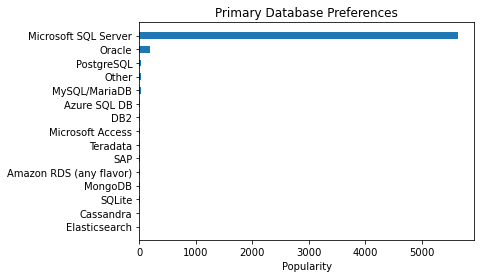

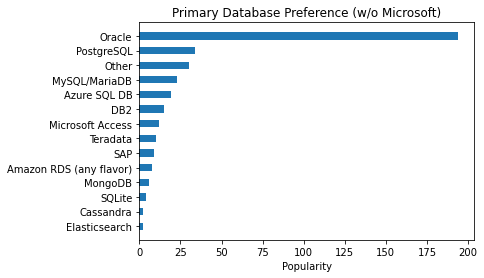

In [5]:
# distribute tuples to different lists
primary_list = []
popularity_list = []
for item in primary_count:
    primary_list.append(item[0])
    popularity_list.append(item[1])

# creating a graph of primary databases
plt.barh(primary_list, popularity_list, 0.5)
plt.xlabel('Popularity')
plt.title('Primary Database Preferences')
plt.tight_layout
plt.show()

# creating another graph without MS SQL Server stats
primary_list.remove('Microsoft SQL Server')
popularity_list.remove(5643)
# creating another graph without MS SQL Server stats
plt.barh(primary_list, popularity_list, 0.5)
plt.xlabel('Popularity')
plt.title('Primary Database Preference (w/o Microsoft)')
plt.tight_layout
plt.show()

##### Analysis 1: most preferred primary databases
Microsoft SQL Server is by far the most used primary database for companies across the world
Oracle seems to be more popular than all other options

In [6]:
# NaN value seems to be causing an error when I try to cleanse the 'OtherDatabases' column, so replace nontype with string 'NaN'
prof_table['OtherDatabases'] = prof_table['OtherDatabases'].fillna("NaN")

In [7]:
# cleanse data in the 'OtherDatabases' column and count occurrences of each item
secondary_count = Counter()
for row in prof_table['OtherDatabases']:
    secondary_count.update(row.split(','))
secondary_count = secondary_count.most_common(20)
print(secondary_count)

[('Microsoft SQL Server', 2061), (' Microsoft Access', 1323), ('NaN', 1232), ('Oracle', 1026), (' MySQL/MariaDB', 948), (' Azure SQL DB', 924), (' PostgreSQL', 659), ('MySQL/MariaDB', 625), (' Oracle', 586), (' Amazon RDS (any flavor)', 458), (' DB2', 387), (' MongoDB', 381), (' SQLite', 360), ('Microsoft Access', 331), ('Azure SQL DB', 201), (' Elasticsearch', 195), ('PostgreSQL', 172), (' SAP', 169), (' Redis', 162), (' Teradata', 107)]


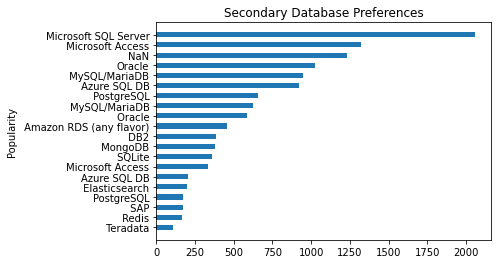

In [8]:
# distribute tuples to different lists
secondary_list = []
secondary_popularity_list = []
for item in secondary_count:
    secondary_list.append(item[0])
    secondary_popularity_list.append(item[1])
secondary_popularity_list.reverse()
secondary_list.reverse()

# create a graph for secondary databases
plt.barh(secondary_list, secondary_popularity_list, 0.5)
plt.ylabel('Popularity')
plt.title('Secondary Database Preferences')
plt.show()

##### Analysis 2: most preferred secondary databases
Once again, MS SQL Server is the most preferred database by far, but the other optionss are also well distributed
It's probably because MS SQL Server is already the most preferred primary database for most companies

In [9]:
# Analyzing the most wanted data professionals in the U.S.
temp = prof_table[['SalaryUSD', 'Country', 'JobTitle', 'YearsWithThisTypeOfJob']]
US_table = temp.loc[temp['Country'] == 'United States']
print(US_table.head(5))

   SalaryUSD        Country                           JobTitle  \
0     200000  United States                                DBA   
12    137500  United States                                DBA   
14     85000  United States                                DBA   
15     96000  United States                                DBA   
17     66000  United States  Developer: App code (C#, JS, etc)   

    YearsWithThisTypeOfJob  
0                        5  
12                       6  
14                       2  
15                       5  
17                      10  


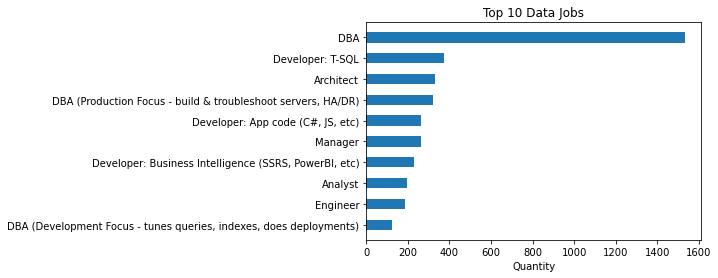

In [10]:
# creating a temporary table to get indexes of DBA (General ...) on the US_table
US_table_copy = US_table.loc[US_table['JobTitle'] == ('DBA (General - splits time evenly between writing & '
                                                    'tuning queries AND building & troubleshooting servers)')]

# merge DBA (General - ...) with DBA by looping through indexes. The purpose is to minimize confusion
for ind in US_table_copy.index:
    US_table.at[ind, 'JobTitle'] = 'DBA'
job_counter = Counter(US_table['JobTitle']).most_common(10)

# create a job list and their occurrences list
job_list = []
job_num = []
for item in job_counter:
    job_list.append(item[0])
    job_num.append(item[1])
job_list.reverse()
job_num.reverse()

# graph the lists
plt.barh(job_list, job_num, 0.5)
plt.title('Top 10 Data Jobs')
plt.xlabel('Quantity')
plt.show()

##### Analysis 3: most wanted data professionals in the U.S.
Database Admin is the most wanted job in the data related field
It's noticeable that at least a half of top 10 in the list branch out from DBA

In [11]:
# I want to know the trend of DBAs' salaries by experience in the U.S.
US_DBA = US_table.loc[US_table['JobTitle'] == 'DBA']
print(US_DBA.head(5))

   SalaryUSD        Country JobTitle  YearsWithThisTypeOfJob
0     200000  United States      DBA                       5
12    137500  United States      DBA                       6
14     85000  United States      DBA                       2
15     96000  United States      DBA                       5
18    101750  United States      DBA                      13


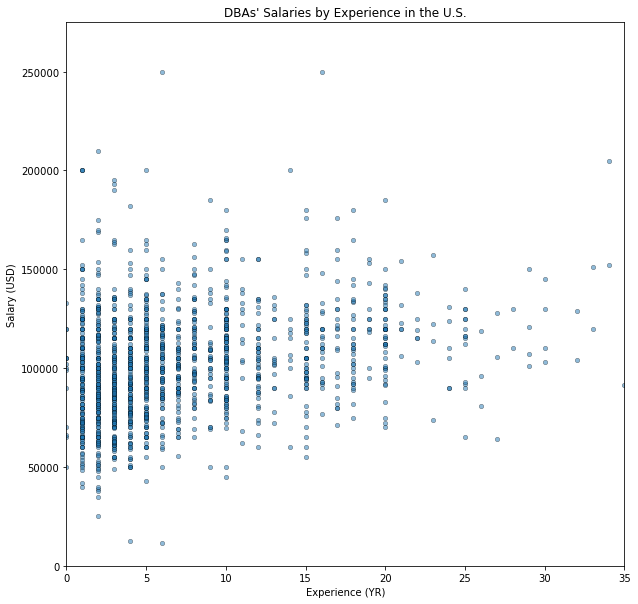

In [24]:
# choose lists for x-axis and y-axis
US_DBA_salary = US_DBA['SalaryUSD']
experience = US_DBA['YearsWithThisTypeOfJob']

# create a scatter graph to see if there is a trend
plt.scatter(experience, US_DBA_salary, linewidths=0.5, s=20, edgecolors='black', alpha=0.5)
plt.ylim(0, 275000) #sets y range
plt.xlim(0, 35) # sets x range
plt.xlabel('Experience (YR)')
plt.ylabel('Salary (USD)')
plt.title("DBAs' Salaries by Experience in the U.S.")
plt.show()
plt.rcParams['figure.figsize'] = [10, 10]

##### Analysis 4: DBAs' salaries by experience in the U.S.
Dark blue indicates the movement of the trend line, while the light blue indicate variance.
There is an apparent positive correlation between salary and experience, 
which makes sense: people with more experience get paid more

In [13]:
# Average, median graphs
'''
let's divide experience into four paritions to calculate median and average
salaries of DBAs in the U.S.
I'm going to use: 
entry level: 0~3, intermediate level:4~8
advanced level: 8~15, expert level: 15 < x 
'''
# generating average/median stats
entry_level = US_DBA[US_DBA['YearsWithThisTypeOfJob'] < 4]
entry_level_median = int(entry_level['SalaryUSD'].median())
entry_level_mean = int(entry_level['SalaryUSD'].mean().round())
print(f'entry level median salary: {entry_level_median}')
print(f'entry level average salary: {entry_level_mean}')

int_level = US_DBA[(3 < US_DBA['YearsWithThisTypeOfJob']) & \
                   (US_DBA['YearsWithThisTypeOfJob'] < 9)]
int_level_median = int(int_level['SalaryUSD'].median())
int_level_mean = int(int_level['SalaryUSD'].mean().round())
print(f'intermediate level median salary: {int_level_median}')
print(f'intermediate level average salary: {int_level_mean}')

advanced_level = US_DBA[(8 < US_DBA['YearsWithThisTypeOfJob']) & \
                   (US_DBA['YearsWithThisTypeOfJob'] < 16)]
advanced_level_median = int(advanced_level['SalaryUSD'].median())
advanced_level_mean = int(advanced_level['SalaryUSD'].mean().round())
print(f'advanced level median salary: {advanced_level_median}')
print(f'advanced level average salary: {advanced_level_mean}')

expert_level = US_DBA[15 < US_DBA['YearsWithThisTypeOfJob']]
expert_level_median = int(expert_level['SalaryUSD'].median())
expert_level_mean = int(expert_level['SalaryUSD'].mean().round())
print(f'expert level median salary: {expert_level_median}')
print(f'expert level average salary: {expert_level_mean}')

entry level median salary: 92100
entry level average salary: 94964
intermediate level median salary: 100000
intermediate level average salary: 104114
advanced level median salary: 106400
advanced level average salary: 113129
expert level median salary: 116000
expert level average salary: 116450


                          Average Salary  Median Salary
entry level (< 4)                  94964          92100
intermediate level (4~8)          104114         100000
advanced level (9~15)             113129         106400
expert level (< 15)               116450         116000


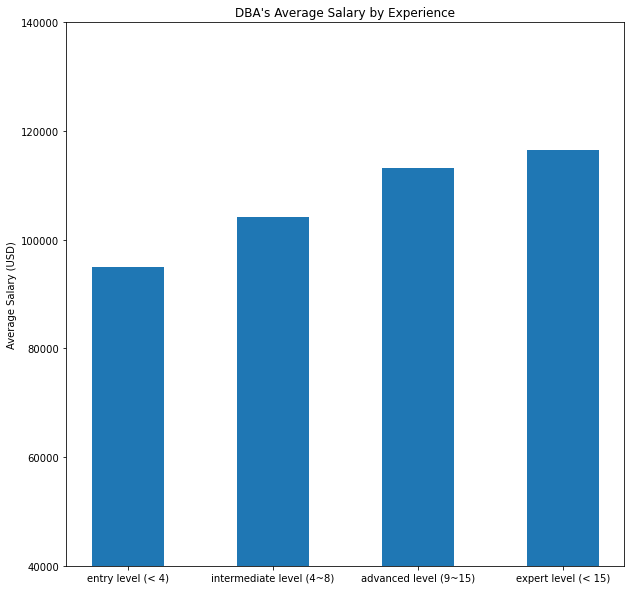

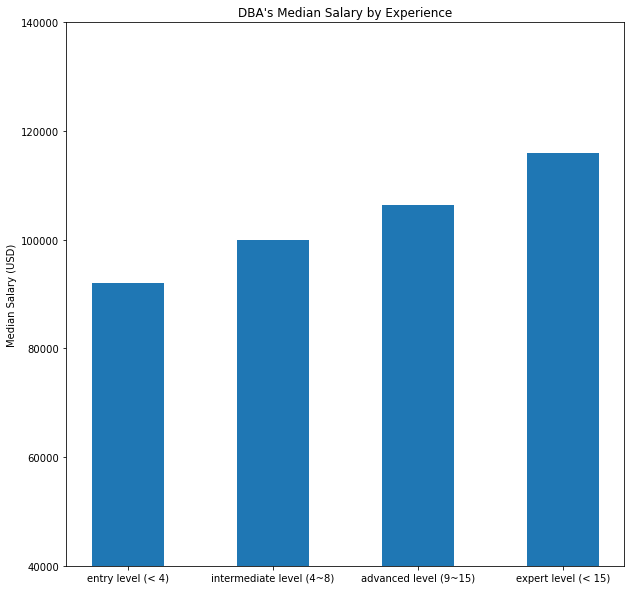

In [14]:
# create a dataframe to display DBA's average/median salaries of all groups
mean_list = [entry_level_mean, int_level_mean, advanced_level_mean, expert_level_mean]
median_list = [entry_level_median, int_level_median, advanced_level_median, expert_level_median]
experience_list = ['entry level (< 4)', 'intermediate level (4~8)',\
                  'advanced level (9~15)', 'expert level (< 15)']
frame = {'Average Salary':mean_list, 'Median Salary':median_list}
salary_df = pd.DataFrame(frame, index=experience_list)
print(salary_df)

# create a graph of average salary by experience groups
plt.ylim(40000, 140000)
plt.title("DBA's Average Salary by Experience")
plt.ylabel("Average Salary (USD)")
plt.bar(experience_list, mean_list, 0.5)
plt.show()
# create a graph of median salary by experience groups
plt.ylim(40000, 140000)
plt.title("DBA's Median Salary by Experience")
plt.ylabel("Median Salary (USD)")
plt.bar(experience_list, median_list, 0.5)
plt.show()

##### Analysis 5: average/median salaries of DBAs in the U.S.
As seen on the scatter graph, these two graphs confirm the trend: more experience results in higher payrolls. 
Both medians and averages were used to display the trend since averages could be skewed by extreme stats.

#### Comparison by Data Visualization

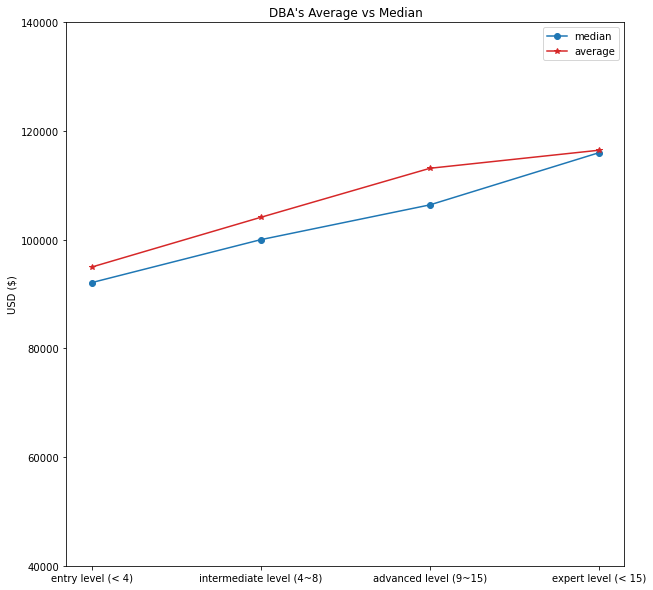

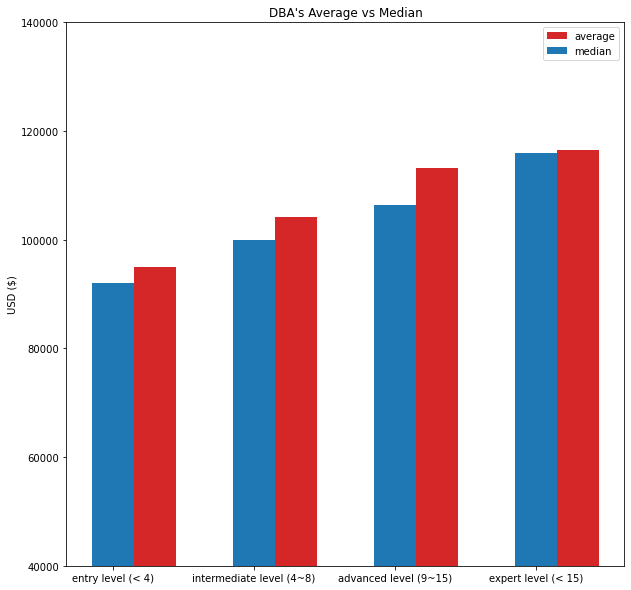

In [15]:
# graph lines to compare average salary vs median salary
plt.ylim(40000, 140000)
plt.title("DBA's Average vs Median")
plt.ylabel('USD ($)')
plt.plot(experience_list, median_list, c='tab:blue', marker='o', label='median')
plt.plot(experience_list, mean_list, c='tab:red', marker='*', label='average')
plt.legend()
plt.show()

# create bar graphs side by side to compare average salary vs median salary
plt.ylim(40000, 140000)
x_indexes = np.arange(len(experience_list))
width = 0.3
plt.title("DBA's Average vs Median")
plt.ylabel('USD ($)')
plt.bar(x_indexes+width, mean_list, width=width, color='tab:red', label='average')
plt.bar(x_indexes, median_list, width=width, color='tab:blue', label='median')
plt.xticks(ticks=x_indexes, labels=experience_list)
plt.legend()
plt.show()

##### Analysis 6: Average/Median Salaries of DBAs in the U.S

In all sections, average salaries are slightly higher than median salaries.

What's noticeable from the table/graphs is average salaries are within the margin of error of ±6.5% of median salaries. 

Therefore, they are both pointing toward congruous estimations, meaning the results are reasonably reliable.

Thus we can give rough approximations of DBA's earning in the U.S.

1. Entry level (0-3 years): 90000 USD       
2. Intermediate level (4-8 years): 100000 USD
3. Advanced level (9-15 years): 108000 USD  
4. Expert level (<15 years): 116000 USD

However, we need to take into account that these salaries are highly dependable on each individual's capability and educational background.

In [16]:
# let's compare DBA's average and median salaries outside of the U.S.
prof_table_copy = prof_table.copy()
for ind in US_table.index:
    prof_table_copy.drop(ind, inplace=True)

# create a DBA table excluding the ones in the U.S.
exclude_US = prof_table_copy[['SalaryUSD', 'Country', 'JobTitle', 'YearsWithThisTypeOfJob']]
DBA_exclude_US = exclude_US.loc[exclude_US['JobTitle'] == 'DBA']
print(DBA_exclude_US)

     SalaryUSD         Country JobTitle  YearsWithThisTypeOfJob
1        61515  United Kingdom      DBA                       3
3        56000  United Kingdom      DBA                       2
4        35000          France      DBA                      10
5       215000  United Kingdom      DBA                      15
6        75000         Germany      DBA                      11
...        ...             ...      ...                     ...
2883    101000          France      DBA                       1
2888     67000         Denmark      DBA                       6
2890     40000           Italy      DBA                      20
2893     36549  United Kingdom      DBA                       1
2894     65000    Saudi Arabia      DBA                       3

[538 rows x 4 columns]


In [17]:
# find DBA's average/median salaries of different experience-groups
entry_level = DBA_exclude_US[DBA_exclude_US['YearsWithThisTypeOfJob'] < 4]
entry_level_median = int(entry_level['SalaryUSD'].median())
entry_level_mean = int(entry_level['SalaryUSD'].mean().round())
print(f'entry level median salary: {entry_level_median}')
print(f'entry level average salary: {entry_level_mean}')

int_level = DBA_exclude_US[(3 < DBA_exclude_US['YearsWithThisTypeOfJob']) & \
                   (DBA_exclude_US['YearsWithThisTypeOfJob'] < 9)]
int_level_median = int(int_level['SalaryUSD'].median())
int_level_mean = int(int_level['SalaryUSD'].mean().round())
print(f'intermediate level median salary: {int_level_median}')
print(f'intermediate level average salary: {int_level_mean}')

advanced_level = DBA_exclude_US[(8 < DBA_exclude_US['YearsWithThisTypeOfJob']) & \
                   (DBA_exclude_US['YearsWithThisTypeOfJob'] < 16)]
advanced_level_median = int(advanced_level['SalaryUSD'].median())
advanced_level_mean = int(advanced_level['SalaryUSD'].mean().round())
print(f'advanced level median salary: {advanced_level_median}')
print(f'advanced level average salary: {advanced_level_mean}')

expert_level = DBA_exclude_US[15 < DBA_exclude_US['YearsWithThisTypeOfJob']]
expert_level_median = int(expert_level['SalaryUSD'].median())
expert_level_mean = int(expert_level['SalaryUSD'].mean().round())
print(f'expert level median salary: {expert_level_median}')
print(f'expert level average salary: {expert_level_mean}')

entry level median salary: 52000
entry level average salary: 53558
intermediate level median salary: 54893
intermediate level average salary: 54934
advanced level median salary: 63150
advanced level average salary: 67816
expert level median salary: 74150
expert level average salary: 82605


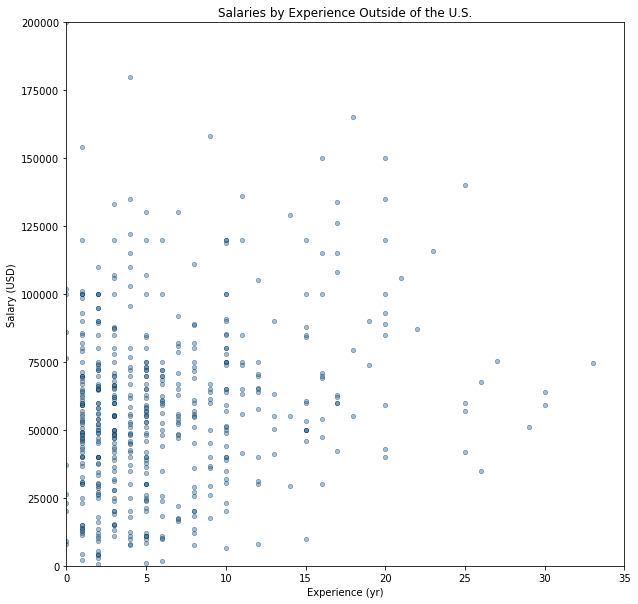

In [18]:
# create lists for x-axis & y-axis
exclude_US_DBA_salary = DBA_exclude_US['SalaryUSD']
experience = DBA_exclude_US['YearsWithThisTypeOfJob']

# create a scatter graph to see if there's a trend
plt.scatter(experience, exclude_US_DBA_salary, linewidths=0.5, s=20, edgecolors='black', alpha=0.45)
plt.ylim(0, 200000) #sets y range
plt.xlim(0, 35) # sets x range
plt.xlabel('Experience (yr)')
plt.ylabel('Salary (USD)')
plt.title('Salaries by Experience Outside of the U.S.')
plt.show()
plt.rcParams['figure.figsize'] = [10, 10]

##### Analsyis 7: average/median salaries of DBAs outside of the U.S.
It's extremely difficult to identify a trend

                          Average Salary  Median Salary
entry level (< 4)                  53558          52000
intermediate level (4~8)           54934          54893
advanced level (9~15)              67816          63150
expert level (< 15)                82605          74150


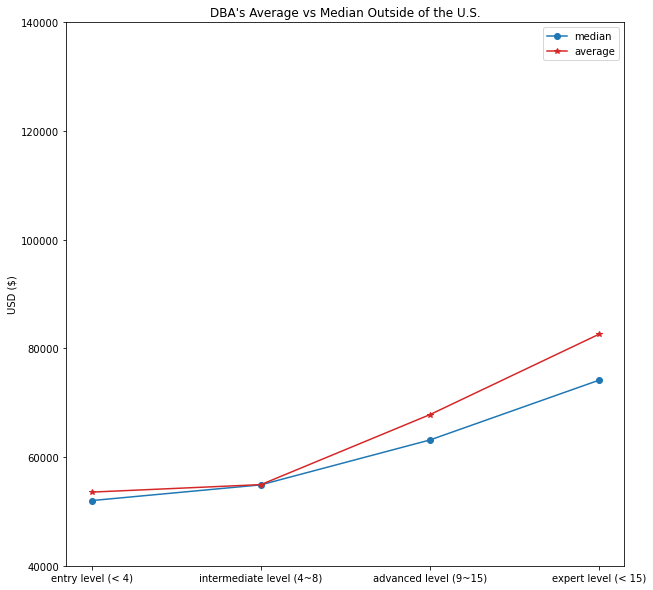

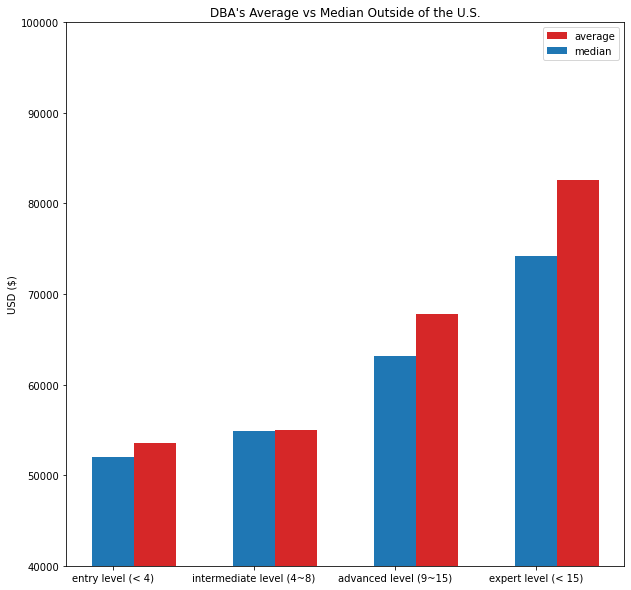

In [19]:
# create a dataframe to display DBA's average/median salaries of all groups (outside of the U.S)
mean_list = [entry_level_mean, int_level_mean, advanced_level_mean, expert_level_mean]
median_list = [entry_level_median, int_level_median, advanced_level_median, expert_level_median]
experience_list = ['entry level (< 4)', 'intermediate level (4~8)',\
                  'advanced level (9~15)', 'expert level (< 15)']
frame = {'Average Salary':mean_list, 'Median Salary':median_list}
salary_df = pd.DataFrame(frame, index=experience_list)
print(salary_df)

# graph lines to compare the average/median salaries of DBA outside of the U.S.
plt.ylim(40000, 140000)
plt.title("DBA's Average vs Median Outside of the U.S.")
plt.ylabel('USD ($)')
plt.plot(experience_list, median_list, c='tab:blue', marker='o', label='median')
plt.plot(experience_list, mean_list, c='tab:red', marker='*', label='average')
plt.legend()
plt.show()

# create bar graphs to compare the average/median salaries of DBA outside of the U.S.
plt.ylim(40000, 100000)
x_indexes = np.arange(len(experience_list))
width = 0.3
plt.title("DBA's Average vs Median Outside of the U.S.")
plt.ylabel('USD ($)')
plt.bar(x_indexes+width, mean_list, width=width, color='tab:red', label='average')
plt.bar(x_indexes, median_list, width=width, color='tab:blue', label='median')
plt.xticks(ticks=x_indexes, labels=experience_list)
plt.legend()
plt.show()

##### Analysis 8: average/median salaries of DBA outside of the U.S.

Both average and median salaries are much lower than those of the U.S.

The growth rate of salaries over experience is much slower until the intermediate level and have a sharp increase til it reaches the expert level. 

However, the expert level average salary is almost equivalent of that of entry-level in the U.S. 

Also, we have to note the survey was participated by 1533 DBAs in the U.S. compared to 538 DBAs outside of the U.S.

It's unclear whether there were much more DBAs in the U.S or the survey was easier to access in the U.S.

If it's the first case, then it should be closely correlated to the higher salaries of the DBAs in the U.S.

           Country  JobTitle
80   United States      3907
79  United Kingdom       595
11          Canada       215
2        Australia       160
33           India       110
71          Sweden        81
25         Germany        80
51     Netherlands        71
69    South Africa        53
52     New Zealand        47


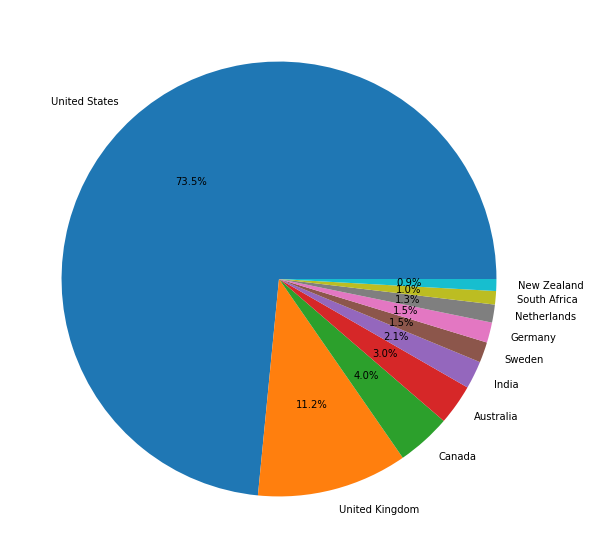

In [20]:
# Let's find job locations
temp = prof_table[['Country', 'JobTitle']]
job_locations = temp.groupby('Country', as_index=False).count()
job_locations = job_locations.sort_values(by='JobTitle', ascending=False).head(10)
print(job_locations)
plt.pie(job_locations['JobTitle'], labels=job_locations['Country'], autopct='%1.1f%%')
# wedgeprops={'edgecolor':'color'} to create an outline
plt.show()

##### Analysis 9: job locations

The percentage difference between the U.S. and the rest of the world tells us many things. 

Firstly, it indicates the availability of the data related jobs is highly concentrated in the U.S.
As seen from previous analyses, DBAs in the U.S. are offered much more competitive salaries, so it probably attracts data professionals around the world to the U.S, causing the concentration.

Secondly, it shows the dominance of the U.S.'s economy. More job opportunities can be created since there are more businesses
running. The U.S. has been leading a number of industries for decades, so the U.S.'s job market should be at one of the
biggest scales in the world.

##### Data Cleansing

In [21]:
# I want to know whether education level affects the median salary of data professionals

def cleanse_num(table, col):
    '''Returns a float from a number string with potentially commas, dollar signs, spaces, etcs in it.\
    Returns None if `val` cannot be converted into a number'''
    for item in table[col]:
        if type(item) == str:
            ind_item = table.loc[table[col] == item].index
            item = item.replace(' ', '')
            item = item.replace('$','')
            item = item.replace(',','')
            item = float(item)
            table.at[ind_item, col] = item
    return table

def cleanse_edu(table, col):
    '''Make terms in the education column simpler.
       This function is specifically for the education table'''
    edu_counter = Counter(table[str(col)])
    edu_list = list(edu_counter.keys())
    for item in edu_list:
        temp = table.loc[table[col] == item]
        for i in temp.index:
            if item == 'Bachelors (4 years)':
                prof_table.at[i, str(col)] = 'Bachelors'
            elif item == 'None (no degree completed)':
                prof_table.at[i, str(col)] = 'None'
            elif item == 'Associates (2 years)':
                prof_table.at[i, str(col)] = 'Associates'
            elif item == 'Doctorate/PhD':
                prof_table.at[i, str(col)] = 'PhD'
            else:
                continue
    return table

In [22]:
# disable the unnecessary warning
pd.options.mode.chained_assignment = None  # default='warn'

# see how much education was completed for most data professionals.
education = prof_table[['SalaryUSD', 'JobTitle', 'Education', 'YearsWithThisTypeOfJob']]
education_counter = Counter(education['Education']).most_common(10)
education_list = []
education_occurrences = []
for item in education_counter:
    education_list.append(item[0])
    education_occurrences.append(item[1])

# cleanse data of the education column and the salary column
cleanse_edu(education, 'Education')
cleanse_num(education, 'SalaryUSD')

# create a table to display occurrences of each education level
education_table = pd.DataFrame({'Occurance':education_occurrences}, index=education_list)
print(education_table)

def edu_median_salary(edu_level, experience):
    """To see the difference in median salaries in more detail, give a median salary of an experience group.
       It should be easier to see whether there's a correlation or not between education and salary"""
    if experience == 'entry':
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] < 4)]
        return temp_table['SalaryUSD'].median()
    elif experience == 'intermediate':
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] >= 4) & \
                    (education['YearsWithThisTypeOfJob'] < 9)]
        return temp_table['SalaryUSD'].median()
    elif experience == 'advanced':
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] >= 9) & \
                    (education['YearsWithThisTypeOfJob'] < 16)]       
        return temp_table['SalaryUSD'].median()
    else:
        temp_table = education.loc[(education['Education'] == edu_level) & \
                    (education['YearsWithThisTypeOfJob'] >= 16)]       
        return temp_table['SalaryUSD'].median()    

                            Occurance
Bachelors (4 years)              3198
Masters                          1080
None (no degree completed)       1022
Associates (2 years)              666
Doctorate/PhD                      45


In [23]:
# create four lists to display median salaries of all ranges of experience side by side
entry_median_salary = []
intermediate_median_salary = []
advanced_median_salary = []
expert_median_salary = []

for item in education_list:
    entry_median_salary.append(edu_median_salary(item, 'entry'))
for item in education_list:
    intermediate_median_salary.append(edu_median_salary(item, 'intermediate'))
for item in education_list:
    advanced_median_salary.append(edu_median_salary(item, 'advanced'))
for item in education_list:
    expert_median_salary.append(edu_median_salary(item, 'expert'))

# create a table of median salaries
all_median = pd.DataFrame({'entry level median salary':entry_median_salary,\
                           'intermediate level median salary': intermediate_median_salary,\
                           'advanced level median salary': advanced_median_salary,\
                           'expert level median salary': expert_median_salary}, index=education_list)
print(all_median)

                            entry level median salary  \
Bachelors (4 years)                           84000.0   
Masters                                       80000.0   
None (no degree completed)                    80000.0   
Associates (2 years)                          75000.0   
Doctorate/PhD                                 79500.0   

                            intermediate level median salary  \
Bachelors (4 years)                                  90000.0   
Masters                                              90000.0   
None (no degree completed)                           85000.0   
Associates (2 years)                                 77650.0   
Doctorate/PhD                                        83610.0   

                            advanced level median salary  \
Bachelors (4 years)                              97000.0   
Masters                                         100000.0   
None (no degree completed)                       85000.0   
Associates (2 years)            

##### Analysis 10: is there no correlation between salaries and education?

There are two possible exlanations behind this outcome.

It could be because there is no salary difference between data professionals on their educational background, which
ultimately tells us there's no coorelation between salaries and education.

However, people with no diploma getting paid equally or even better than people with PhDs at entry and intermediate levels 
makes not much sense to me.

Thus, I believe it's due to the difference of quantity of collected data for each education-level groups.
For example, there were 3198 Bachelors compared to 45 PhDs who have finished the survey.

The lack of sample sizes for some groups has mostly likely caused the skewed outcome. To my belief,
if there were more samples for all groups, this data would've yielded a significantly stable outcome.